# Crisp Corner Waste Management Strategy

### Problem Statement: 
Crisp Corner, a renowned French fries restaurant, is facing challenges with wastage of raw materials, impacting both costs and operational efficiency. The owner, Mr. Arslan, seeks insights and strategies to minimize wastage and optimize resource utilization.

### Task: 
Conduct a comprehensive analysis of Crisp Corner's past 3 to 4 years of data related to raw material usage, wastage, associated costs, and reasons contributing to wastage.

### Objectives
- Determine the quantity of raw material that has been wasted over the past 3 to 4 years.
- Assess the financial impact of this wastage on the restaurant's expenses and profitability.
- Analyze the primary factors contributing to wastage
- Evaluate if there's a need to reduce the amount of raw material
- Quantify the potential savings that could be achieved by implementing strategies to reduce wastage.

### End Goal:
The primary aim of this project is to provide actionable insights and recommendations to Mr. Arslan, the owner of Crisp Corner.

In [30]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns 

In [31]:
# Reading csv file 

data = pd.read_csv('crisp_corner.csv')

In [32]:
# Creating a copy of the dataset

data_copy = data

In [33]:
# Taking a look at the dataset

data.head()

,Date,Customer_ID,Quantity_Sold,Type_of_Order,Raw_Material_Purchased,Price_per_kg,Wastage_Amount,Reason_for_Wastage,Sales_Revenue
0,"Friday, November 20, 2020",38,130,Small,415,2.7,4,Unsold Inventory,1680
1,"Friday, November 20, 2020",42,133,Regular,209,2.8,5,Overcooked,877
2,"Saturday, November 21, 2020",74,108,Large,104,2.4,7,Unsold Inventory,374
3,"Saturday, November 21, 2020",50,193,Small,465,2.0,6,Overcooked,1395
4,"Saturday, November 21, 2020",7,61,Special,492,2.2,15,Damaged,1623


In [34]:
# Droping unnecessary columns

datab = data.drop(['Customer_ID', 'Type_of_Order'], axis=1)

In [35]:
# Taking a look at the data 

data.head()

,Date,Customer_ID,Quantity_Sold,Type_of_Order,Raw_Material_Purchased,Price_per_kg,Wastage_Amount,Reason_for_Wastage,Sales_Revenue
0,"Friday, November 20, 2020",38,130,Small,415,2.7,4,Unsold Inventory,1680
1,"Friday, November 20, 2020",42,133,Regular,209,2.8,5,Overcooked,877
2,"Saturday, November 21, 2020",74,108,Large,104,2.4,7,Unsold Inventory,374
3,"Saturday, November 21, 2020",50,193,Small,465,2.0,6,Overcooked,1395
4,"Saturday, November 21, 2020",7,61,Special,492,2.2,15,Damaged,1623


In [36]:
# Changing the data type of Date column

data['Date'] = pd.to_datetime(data['Date'])

In [37]:
# Checking information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    3354 non-null   datetime64[ns]
 1   Customer_ID             3354 non-null   int64         
 2   Quantity_Sold           3354 non-null   int64         
 3   Type_of_Order           3354 non-null   object        
 4   Raw_Material_Purchased  3354 non-null   int64         
 5   Price_per_kg            3354 non-null   float64       
 6   Wastage_Amount          3354 non-null   int64         
 7   Reason_for_Wastage      3354 non-null   object        
 8   Sales_Revenue           3354 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 236.0+ KB


In [38]:
# Extracting week days & months from Date column

data['day of Week'] = data['Date'].dt.strftime('%A')
data['month'] = data['Date'].dt.month

In [39]:
# Checking for Duplicate Data

data.duplicated().sum()

0

In [40]:
# Create a dictionary mapping month numbers to their names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

data['month_name'] = data['month'].map(month_names)
data['year'] = data['Date'].dt.year

In [41]:
data.head()

,Date,Customer_ID,Quantity_Sold,Type_of_Order,Raw_Material_Purchased,Price_per_kg,Wastage_Amount,Reason_for_Wastage,Sales_Revenue,day of Week,month,month_name,year
0,2020-11-20,38,130,Small,415,2.7,4,Unsold Inventory,1680,Friday,11,November,2020
1,2020-11-20,42,133,Regular,209,2.8,5,Overcooked,877,Friday,11,November,2020
2,2020-11-21,74,108,Large,104,2.4,7,Unsold Inventory,374,Saturday,11,November,2020
3,2020-11-21,50,193,Small,465,2.0,6,Overcooked,1395,Saturday,11,November,2020
4,2020-11-21,7,61,Special,492,2.2,15,Damaged,1623,Saturday,11,November,2020


In [42]:
# Checking Unique values in Year column

data['year'].unique()

array([2020, 2021, 2022, 2023], dtype=int64)

### Insights

---
- Dataset contain 4 years of data
---

---

## 1. General Look at total Sales, Revenue & Waste material

In [43]:
# Total Sales Each day of week in 4 years

weekly_sales = data.groupby('day of Week')[['Sales_Revenue']].sum()
weekly_sales.head(7)

,Sales_Revenue
day of Week,
Friday,554274
Monday,588382
Saturday,495089
Sunday,537682
Thursday,557037
Tuesday,533681
Wednesday,525973


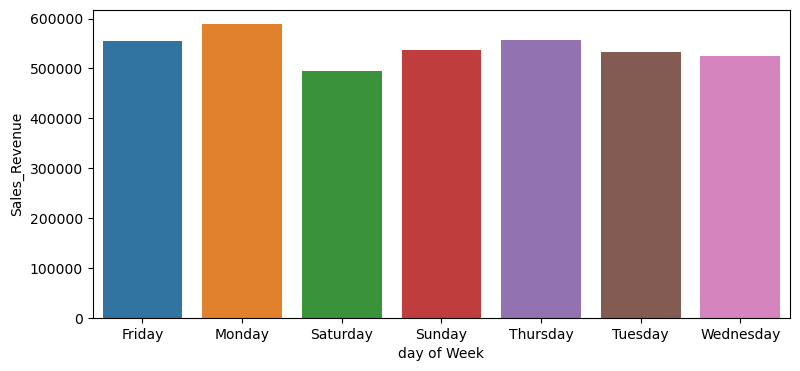

In [44]:
# Ploting a bar plot for Days of week and Total Sales

plt.figure(figsize=(9, 4))
sns.barplot(x = weekly_sales.index , y = weekly_sales['Sales_Revenue'] )
plt.show()

### Insights

---
- Monday has the highest sales followed by friday & thursady
- Saturday has the lowest sales
---

In [45]:
# Total Wastage Generated each day of week in 4 years

weekly_waste = data.groupby('day of Week')[['Wastage_Amount']].sum()
weekly_waste.head(7)

,Wastage_Amount
day of Week,
Friday,4830
Monday,5230
Saturday,4355
Sunday,5031
Thursday,4816
Tuesday,4768
Wednesday,4739


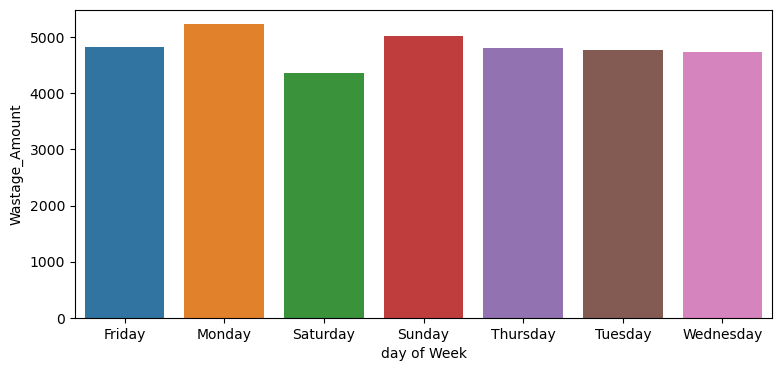

In [46]:
# Ploting a bar plot for Days of week and Total Wastage

plt.figure(figsize=(9, 4))
sns.barplot(x = weekly_waste.index, y = weekly_waste['Wastage_Amount'] )
plt.show()

### Insights

---
- Monday has the highest wastage amount as well followed by sunday & friday for past three years
- saturday has the lowest waste amount in past 3 years
---

In [47]:
# Grouping data by Reason of Wastage

wastage_reasons = data.groupby('Reason_for_Wastage')[['Wastage_Amount']].sum().sort_values(
    by='Wastage_Amount', ascending = False)

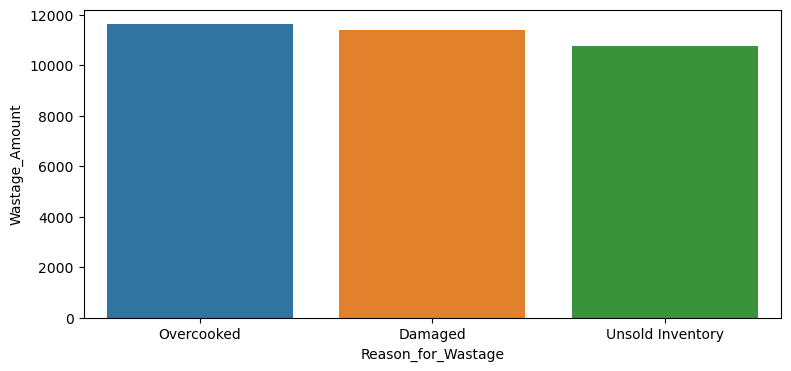

In [48]:
plt.figure(figsize=(9,4))
sns.barplot(x= wastage_reasons.index, y= wastage_reasons['Wastage_Amount'])
plt.show()

### Insights

---
- In past 4 years major portion of waste is generated due to overcooking & damaged fries
---

## 2. Year by Year Analysis

In [49]:
# Filtering data for each year

year_2020 = data[data['year'] == 2020]
year_2021 = data[data['year'] == 2021]
year_2022 = data[data['year'] == 2022]
year_2023 = data[data['year'] == 2023]

In [50]:
yearly_wastage = data.groupby('year')[['Wastage_Amount']].sum()

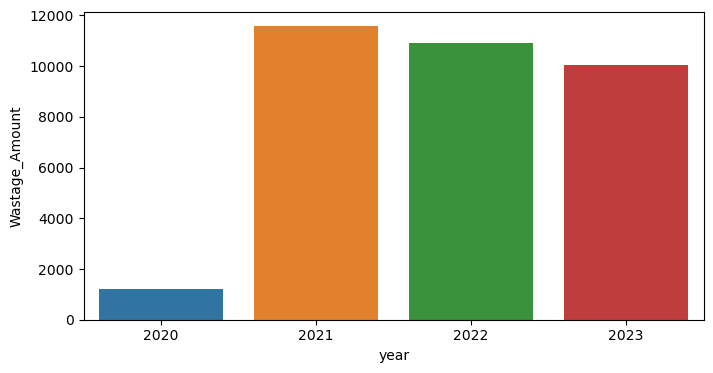

In [63]:
plt.figure(figsize=(8,4))
sns.barplot(x= yearly_wastage.index, y = yearly_wastage['Wastage_Amount'])
plt.show()

In [52]:
# Calculating percentage wastage each year

waste_2020 = (year_2020['Wastage_Amount'].sum()) / (year_2020['Raw_Material_Purchased'].sum())*100
waste_2021 = (year_2021['Wastage_Amount'].sum()) / (year_2021['Raw_Material_Purchased'].sum())*100
waste_2022 = (year_2022['Wastage_Amount'].sum()) / (year_2022['Raw_Material_Purchased'].sum())*100
waste_2023 = (year_2023['Wastage_Amount'].sum()) / (year_2023['Raw_Material_Purchased'].sum())*100

print('Year 2020 %age waste of raw material =', waste_2020.round(2))
print('Year 2021 %age waste of raw material =', waste_2021.round(2))
print('Year 2022 %age waste of raw material =', waste_2022.round(2))
print('Year 2023 %age waste of raw material =', waste_2023.round(2))

Year 2020 %age waste of raw material = 3.33
Year 2021 %age waste of raw material = 3.32
Year 2022 %age waste of raw material = 3.3
Year 2023 %age waste of raw material = 3.38


In [65]:
# Calculating percentage wastage for each reason

reason_2020 = year_2020.groupby('Reason_for_Wastage')[['Raw_Material_Purchased', 'Wastage_Amount']].sum()
reason_2020['%waste of raw'] = (reason_2020['Wastage_Amount'] / reason_2020['Raw_Material_Purchased'].sum() ) * 100

reason_2021 = year_2021.groupby('Reason_for_Wastage')[['Raw_Material_Purchased', 'Wastage_Amount']].sum()
reason_2021['%waste of raw'] = (reason_2021['Wastage_Amount'] / reason_2021['Raw_Material_Purchased'].sum() ) * 100

reason_2022 = year_2022.groupby('Reason_for_Wastage')[['Raw_Material_Purchased', 'Wastage_Amount']].sum()
reason_2022['%waste of raw'] = (reason_2022['Wastage_Amount'] / reason_2022['Raw_Material_Purchased'].sum() ) * 100

reason_2023 = year_2023.groupby('Reason_for_Wastage')[['Raw_Material_Purchased', 'Wastage_Amount']].sum()
reason_2023['%waste of raw'] = (reason_2023['Wastage_Amount'] / reason_2023['Raw_Material_Purchased'].sum() ) * 100

In [89]:
reason_2020_data = pd.DataFrame(reason_2020[['%waste of raw']])
reason_2021_data = pd.DataFrame(reason_2021[['%waste of raw']])
reason_2022_data = pd.DataFrame(reason_2022[['%waste of raw']])
reason_2023_data = pd.DataFrame(reason_2023[['%waste of raw']])

In [92]:
merged_data = pd.merge(reason_2020_data, reason_2021_data, on = 'Reason_for_Wastage')
merged_data = pd.merge(merged_data, reason_2022_data, on = 'Reason_for_Wastage')
merged_data = pd.merge(merged_data, reason_2023_data, on = 'Reason_for_Wastage')
merged_data.round(2)

C:\Users\SONU COMPUTER\AppData\Local\Temp\ipykernel_11080\2037126734.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'%waste of raw_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data = pd.merge(merged_data, reason_2023_data, on = 'Reason_for_Wastage')


,%waste of raw_x,%waste of raw_y,%waste of raw_x,%waste of raw_y
Reason_for_Wastage,,,,
Damaged,1.27,1.08,1.20,1.08
Overcooked,1.05,1.18,1.14,1.13
Unsold Inventory,1.01,1.07,0.96,1.17


In [88]:
# Changing the name of the columns

new_column_name = {
    '%waste of raw_x': 'Year 2020',
    '%waste of raw_y': 'Year 2021',
    '%waste of raw_x': 'Year 2022',
    '%waste of raw_y': 'Year 2023'
}

merged_data = merged_data.rename(columns=new_column_name)
merged_data

,Year 2022,Year 2023,Year 2022,Year 2023
Reason_for_Wastage,,,,
Damaged,1.269616,1.077425,1.198803,1.082077
Overcooked,1.054381,1.177383,1.141674,1.128481
Unsold Inventory,1.005340,1.068233,0.963032,1.168495


### Insights

---
- Returant wasted nearly same 3.3% of raw material each year
- Damaging, over cooking and unsold inventory, these reasons contribute nearly equaly in the wastage generation
---

In [60]:
rev_lost_2020 = year_2020['Price_per_kg'].mean() * year_2020['Wastage_Amount'].sum()
rev_lost_2021 = year_2021['Price_per_kg'].mean() * year_2021['Wastage_Amount'].sum()
rev_lost_2022 = year_2022['Price_per_kg'].mean() * year_2022['Wastage_Amount'].sum()
rev_lost_2023 = year_2023['Price_per_kg'].mean() * year_2023['Wastage_Amount'].sum()

In [61]:
percentage_rev_lost_2020 = ( rev_lost_2020 / year_2020['Sales_Revenue'].sum() ) * 100
percentage_rev_lost_2021 = ( rev_lost_2021 / year_2021['Sales_Revenue'].sum() ) * 100
percentage_rev_lost_2022 = ( rev_lost_2022 / year_2022['Sales_Revenue'].sum() ) * 100
percentage_rev_lost_2023 = ( rev_lost_2023 / year_2023['Sales_Revenue'].sum() ) * 100

In [62]:
print('Percentage Revenue Loss in year 2020:', percentage_rev_lost_2020.round(2))
print('Percentage Revenue Loss in year 2021:', percentage_rev_lost_2021.round(2))
print('Percentage Revenue Loss in year 2022:', percentage_rev_lost_2022.round(2))
print('Percentage Revenue Loss in year 2023:', percentage_rev_lost_2023.round(2))

Percentage Revenue Loss in year 2020: 2.22
Percentage Revenue Loss in year 2021: 2.22
Percentage Revenue Loss in year 2022: 2.2
Percentage Revenue Loss in year 2023: 2.25


### Insights

---
- Resturant lost nearly 2.2% of total revenue due to wastage each year
---

---

# Insights

- Restaurant wasted nearly 3.3% of raw material each year
- Damaging, over cooking and unsold inventory, these reasons contribute nearly equaly in the wastage generation
- Resturant lost nearly 2.2% of total revenue due to wastage each year.
- Each year atleast 1% of raw material is unsold

# Recommendation

- Although the wastage percentage remains consistent annually at around 3.3%, it's essential to further analyze each stage of food preparation and service.
- Implement targeted training programs for staff to handle ingredients more efficiently, improve cooking techniques, and revise menu items to minimize wastage without compromising quality.
- 2.2% of total revenue loss due to wastage is significant. Consider introducing strategies to mitigate this loss.
- Raw material can be reduced by 1% for next year 